<a href="https://colab.research.google.com/github/sumanankur108/eda-theory-da/blob/main/module_2_21bds0097.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
%cd drive/MyDrive

/content/drive/MyDrive


In [47]:
!ls

'Colab Notebooks'			        index-file.ipynb
 data_mining_lab_assessment		        index-file.pdf
 deep_learning_lab_assessment		        insta_sentiment_analysis_results.csv
 emoji_usage.csv			        machine_learning_lab_assessment
 exploratory-data-analysis		        project_final_year
 face-recognition			        top_chat_partners.csv
 foundation-of-data-science-theory-assessment


In [48]:
%cd exploratory-data-analysis/

/content/drive/MyDrive/exploratory-data-analysis


In [50]:
!ls

liver_data.csv


In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv("liver_data.csv")

# Display basic information
print(df.info())

# Display the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [52]:
# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Select only numerical columns for mean imputation
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Drop rows with missing categorical values
df.dropna(subset=['Gender of the patient'], inplace=True)

# Display updated dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29789 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    29789 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       29789 non-null  float64
 3   Direct Bilirubin                      29789 non-null  float64
 4   Alkphos Alkaline Phosphotase          29789 non-null  float64
 5   Sgpt Alamine Aminotransferase         29789 non-null  float64
 6   Sgot Aspartate Aminotransferase       29789 non-null  float64
 7   Total Protiens                        29789 non-null  float64
 8   ALB Albumin                           29789 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  29789 non-null  float64
 10  Result                                29789 non-null  int64  
dtypes: float64(9), int64

In [53]:
# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Rename specific columns if needed
df.rename(columns={'Alkphos Alkaline Phosphotase': 'Alkaline_Phosphatase',
                   'Sgpt Alamine Aminotransferase': 'SGPT',
                   'Sgot Aspartate Aminotransferase': 'SGOT',
                   'Total Protiens': 'Total_Proteins',
                   'ALB Albumin': 'Albumin',
                   'A/G Ratio Albumin and Globulin Ratio': 'A_G_Ratio'},
          inplace=True)

# Display updated column names
print(df.columns)

Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkaline_Phosphatase', 'SGPT', 'SGOT',
       'Total_Proteins', 'Albumin', 'A_G_Ratio', 'Result'],
      dtype='object')


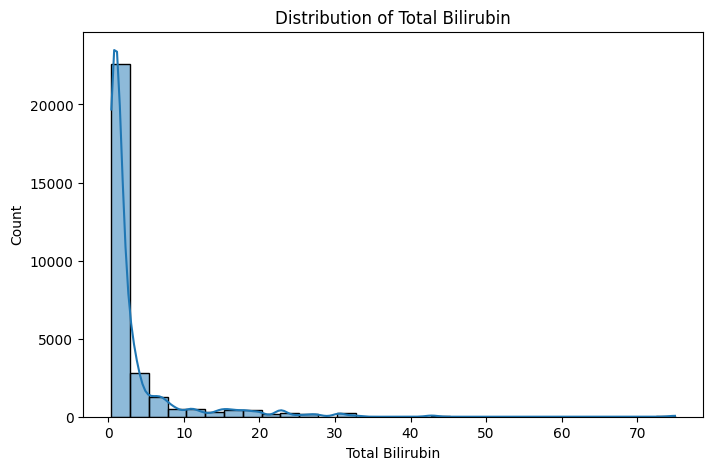

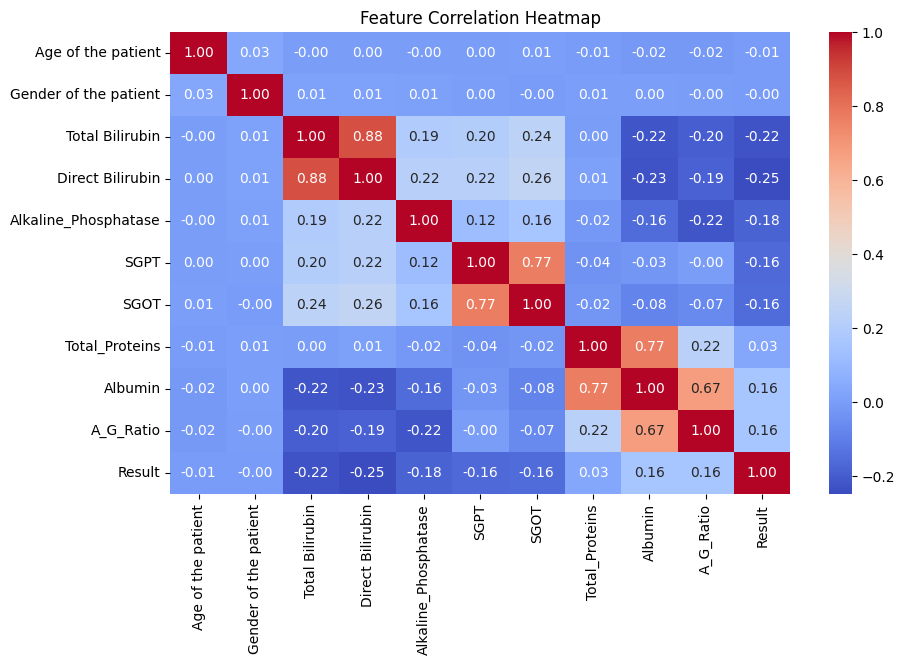

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of Total Bilirubin
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Bilirubin'], bins=30, kde=True)
plt.title('Distribution of Total Bilirubin')
plt.show()

# Convert categorical column ('Gender of the patient') into numeric values (Male = 1, Female = 0)
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})

# Drop any remaining non-numeric columns (if any)
df_numeric = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [55]:
# Convert Gender column to numerical (Male=1, Female=0)
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})

# Check unique values after conversion
print(df['Gender of the patient'].unique())


[nan]


In [56]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['Result'])  # Exclude target column
y = df['Result']  # Target variable

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (23831, 10), Testing set: (5958, 10)


In [58]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("liver_data.csv")

# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert categorical column ('Gender of the patient') to numeric
df['Gender of the patient'] = df['Gender of the patient'].map({'Male': 1, 'Female': 0})

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Compute IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Display dataset shape before and after removing outliers
print(f"Original dataset size: {df.shape}")
print(f"Filtered dataset size: {df_filtered.shape}")


Original dataset size: (30691, 11)
Filtered dataset size: (21102, 11)


In [59]:
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = df[numerical_cols].apply(zscore)

# Define threshold for outliers (commonly 3)
threshold = 3

# Filter dataset by removing outliers
df_filtered_z = df[(z_scores < threshold).all(axis=1)]

# Display dataset shape before and after removing outliers
print(f"Original dataset size: {df.shape}")
print(f"Filtered dataset size: {df_filtered_z.shape}")


Original dataset size: (30691, 11)
Filtered dataset size: (0, 11)


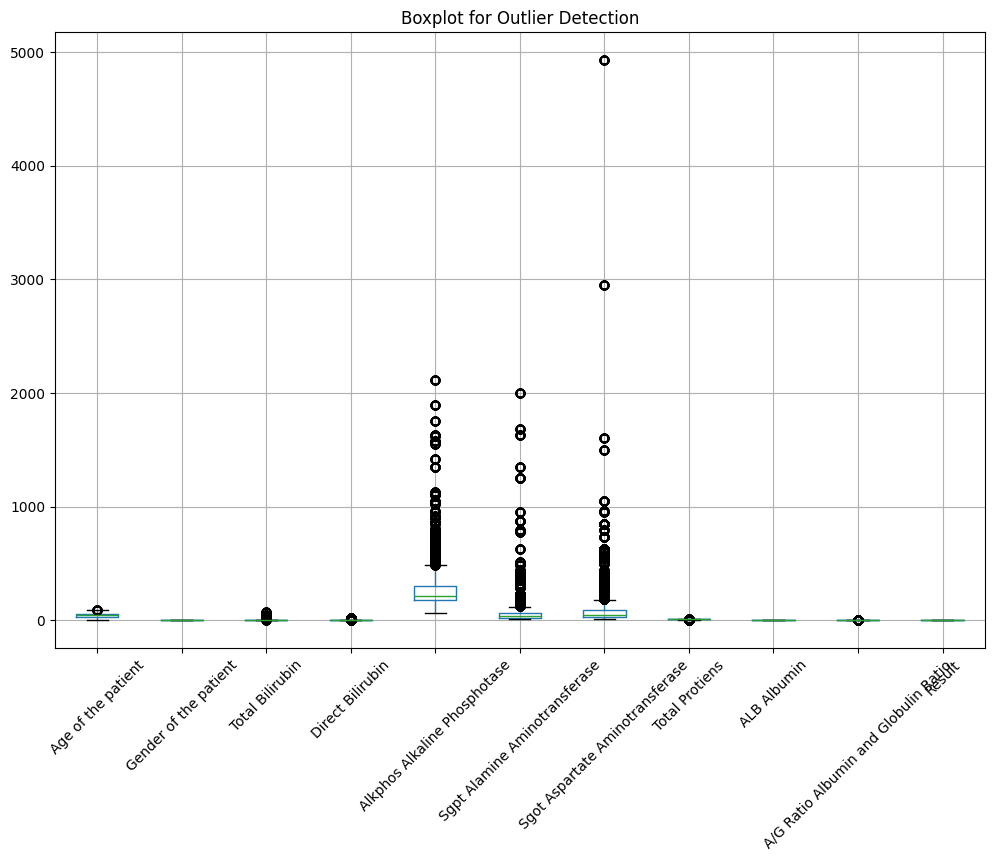

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [61]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (Cap at 5th and 95th percentile)
df_winsorized = df.copy()
for col in numerical_cols:
    df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])  # Limits: 5% lower & upper

print(df_winsorized.describe())

       Age of the patient  Gender of the patient  Total Bilirubin  \
count        30691.000000           30691.000000     30691.000000   
mean            44.087224               0.745756         3.561321   
std             14.973474               0.435442         5.668581   
min             18.000000               0.000000         0.600000   
25%             32.000000               0.000000         0.800000   
50%             45.000000               1.000000         1.000000   
75%             55.000000               1.000000         2.800000   
max             70.000000               1.000000        22.500000   

       Direct Bilirubin  Alkphos Alkaline Phosphotase  \
count      30691.000000                  30691.000000   
mean           1.580962                    296.391418   
std            2.666076                    208.057367   
min            0.100000                    137.000000   
25%            0.200000                    176.000000   
50%            0.300000             

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

In [62]:
import pandas as pd

# Load dataset
df = pd.read_csv("liver_data.csv")

# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Create a derived feature (Bilirubin Ratio = Total Bilirubin × Direct Bilirubin)
df['Bilirubin Ratio'] = df['Total Bilirubin'] * df['Direct Bilirubin']

# Display the dataset with the new column
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Bilirubin Ratio
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0.07
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,59.95
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,29.93
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0.40
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,7.80


In [63]:
import numpy as np

# Define threshold for high Bilirubin Ratio
threshold = 10

# Identify outlier cases
outliers = df[df['Bilirubin Ratio'] > threshold]

# Display the rows with extreme values
outliers


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Bilirubin Ratio
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,59.95
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,29.93
27,34.0,Male,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.20,1,18.60
37,46.0,Female,14.2,7.8,374.0,NaN,77.0,4.3,2.0,0.80,1,110.76
42,42.0,Male,6.8,3.2,630.0,25.0,47.0,6.1,2.3,0.60,2,21.76
...,...,...,...,...,...,...,...,...,...,...,...,...
30639,50.0,Female,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,59.95
30660,60.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1,20.40
30665,50.0,Male,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.20,1,18.60
30675,45.0,Male,14.2,7.8,374.0,38.0,77.0,4.3,2.0,0.80,1,110.76


In [64]:
# Show records where Bilirubin Ratio > 15
df[df['Bilirubin Ratio'] > 15]

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Bilirubin Ratio
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,59.95
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,29.93
27,34.0,Male,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.20,1,18.60
37,46.0,Female,14.2,7.8,374.0,NaN,77.0,4.3,2.0,0.80,1,110.76
42,42.0,Male,6.8,3.2,630.0,25.0,47.0,6.1,2.3,0.60,2,21.76
...,...,...,...,...,...,...,...,...,...,...,...,...
30639,50.0,Female,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,59.95
30660,60.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1,20.40
30665,50.0,Male,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.20,1,18.60
30675,45.0,Male,14.2,7.8,374.0,38.0,77.0,4.3,2.0,0.80,1,110.76


In [65]:
# Create a new feature: Liver Enzyme Ratio (SGOT / SGPT)
df['Liver Enzyme Ratio'] = df['Sgot Aspartate Aminotransferase'] / df['Sgpt Alamine Aminotransferase']

# Display the dataset with the new column
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Bilirubin Ratio,Liver Enzyme Ratio
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1,0.07,1.125000
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1,59.95,1.562500
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1,29.93,1.133333
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1,0.40,1.428571
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1,7.80,2.185185


In [66]:
# Identify cases with high Liver Enzyme Ratio (>2.0)
high_enzyme_cases = df[df['Liver Enzyme Ratio'] > 2.0]

# Display the high-risk cases
high_enzyme_cases

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Bilirubin Ratio,Liver Enzyme Ratio
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,1,7.80,2.185185
16,38.0,Male,1.8,0.8,342.0,168.0,441.0,7.6,4.4,1.3,1,1.44,2.625000
23,40.0,NaN,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.6,1,1.90,3.437500
30,57.0,Male,4.0,1.9,190.0,45.0,111.0,5.2,1.5,0.4,1,7.60,2.466667
41,62.0,Male,0.6,0.1,160.0,42.0,110.0,4.9,2.6,1.1,2,0.06,2.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30675,45.0,Male,14.2,7.8,374.0,38.0,77.0,4.3,2.0,0.8,1,110.76,2.026316
30679,74.0,Male,0.6,0.1,160.0,42.0,110.0,4.9,2.6,1.1,2,0.06,2.619048
30683,58.0,NaN,NaN,NaN,275.0,48.0,178.0,6.5,3.2,0.9,2,NaN,3.708333
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.6,1,1.90,3.437500


In [67]:
df[df['Liver Enzyme Ratio'] > 3.0]

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Bilirubin Ratio,Liver Enzyme Ratio
23,40.0,NaN,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1,1.90,3.437500
45,35.0,Male,1.8,0.6,275.0,48.0,178.0,6.5,3.2,0.90,2,1.08,3.708333
52,38.0,Male,3.1,1.6,253.0,80.0,406.0,6.8,3.9,1.30,1,4.96,5.075000
96,39.0,Male,3.8,1.5,298.0,102.0,630.0,7.1,3.3,0.80,1,5.70,6.176471
97,39.0,Male,6.6,3.0,215.0,190.0,950.0,4.0,1.7,0.70,1,19.80,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30620,35.0,Male,22.5,11.8,143.0,22.0,143.0,6.6,2.1,0.46,1,265.50,6.500000
30661,45.0,Male,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1,1.90,3.437500
30683,58.0,NaN,NaN,NaN,275.0,48.0,178.0,6.5,3.2,0.90,2,NaN,3.708333
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1,1.90,3.437500


In [42]:
import pandas as pd

# Load dataset
df = pd.read_csv("liver_data.csv")

# Ensure column names are stripped of leading/trailing spaces
df.columns = df.columns.str.strip()

# Define age bins and labels
age_bins = [0, 30, 40, 50, 60, 70, 100]  # Define bins
age_labels = ['Below 30', '30-40', '40-50', '50-60', '60-70', 'Above 70']  # Define category labels

# Apply binning
df['Age Group'] = pd.cut(df['Age of the patient'], bins=age_bins, labels=age_labels)

# Display the dataset with new binning column
df[['Age of the patient', 'Age Group']].head()

,Age of the patient,Age Group
0,65.0,60-70
1,62.0,60-70
2,62.0,60-70
3,58.0,50-60
4,72.0,Above 70


In [68]:
# Define Bilirubin bins and labels
bilirubin_bins = [0, 0.5, 1.2, 3.0, 10.0, 50.0]  # Define ranges
bilirubin_labels = ['Normal', 'Mild', 'Moderate', 'High', 'Critical']  # Define labels

# Apply binning
df['Bilirubin Level'] = pd.cut(df['Total Bilirubin'], bins=bilirubin_bins, labels=bilirubin_labels)

# Display dataset with new binning column
df[['Total Bilirubin', 'Bilirubin Level']].head()


,Total Bilirubin,Bilirubin Level
0,0.7,Mild
1,10.9,Critical
2,7.3,High
3,1.0,Mild
4,3.9,High
